In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
le = preprocessing.LabelEncoder()

In [3]:
dat=pd.read_csv('data.csv')

In [6]:
X = dat.iloc[:,0:4]

In [7]:
X.head()

,ag1e,gender,married,employed
0,25,0,0,0
1,30,0,0,1
2,25,1,0,1
3,35,0,1,1
4,40,1,1,0


In [8]:
y=dat.iloc[:,4]

In [9]:
y.head()

0    lhpd
1    lhpd
2    lhpd
3    lhpd
4      lh
Name: res, dtype: object

In [10]:
le.fit(y)
m=le.transform(y)

In [12]:
m

array([2, 2, 2, ..., 0, 1, 5])

In [13]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, m)


In [17]:
final_res=clf.predict([[25,0,0,1]])



In [18]:
print(le.inverse_transform(final_res))

['lhpd']


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
l='Life Insurance'
h='Health Insurance'
pd= 'Property Insurance'

In [30]:
data_feature_names=['age','gender','marital status','employment status']

In [32]:
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
 
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)
 
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
 
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
 
graph.write_png('tree.png')
 

True

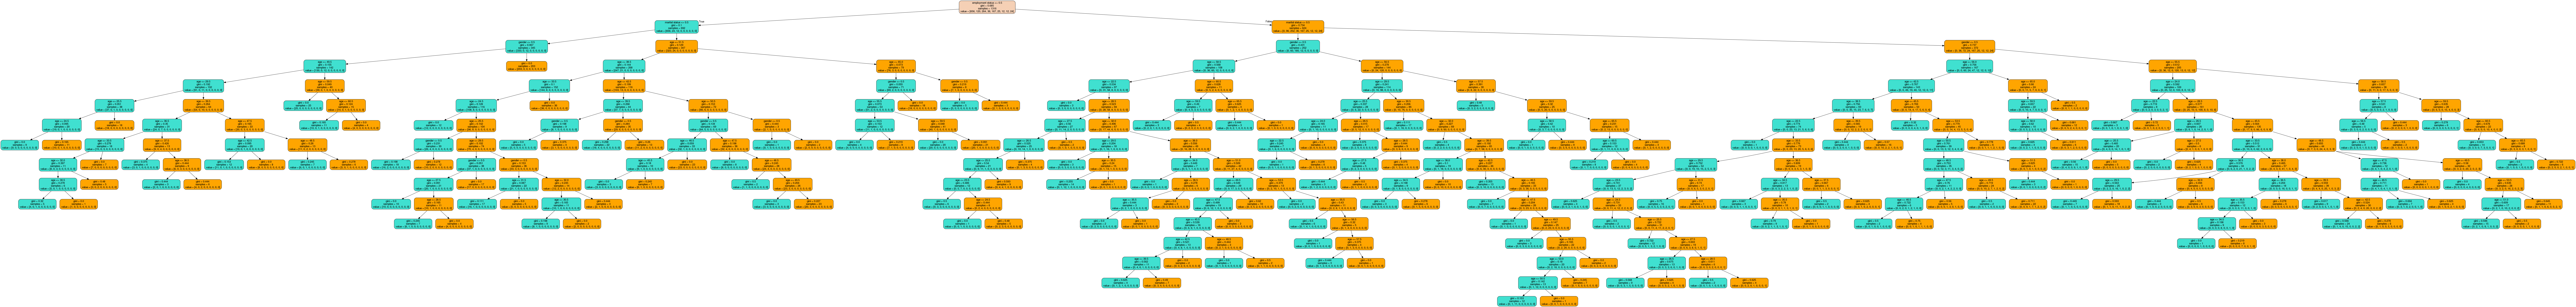

In [36]:
Image('tree.png')